# Grant spending by town

The spreadsheets for these reports were downloaded from here: 

* https://www.csde.state.ct.us/public/dgm/grantreports1/PayDetlViewRpt.aspx

on Sept. 25 as CSV files for the fiscal years 04 through 18. 

However, some of these files had errors becuase they were not properly escaped. So the file fix.sh is a bash script that cleans the original files, so you can follow each fix.

In [1]:
import pandas as pd

In [2]:
def get_df(year):
    return pd.read_csv("data/GRANT_LEVELS/%s-paydetl.csv" % str(year))

get_df(2017).head()

,Town,VName,Vendor,VAddrs,VType,VGrp,Spons,CCode,Payment,PayDate,...,InvoiceNum,InvDate,Date2,CCode_A,TTYpe,CCode_B,Project,Acct,Qtr,Unnamed: 20
0,2,Ansonia,2,1,0,1,NaN,11000-16201-82079-2017-170002-,1562.0,10/21/2016,...,CM_SDE_NOV2016_00001_2016295,2016/10/21 #: CM_SDE_NOV2016_00001_2016295,10/21/2016,11000-16201-82079-2017,2,11000-16201-82079-170002,SDE000000000002,55070,QE-2 12/31,NaN
1,2,Ansonia,2,1,0,1,NaN,11000-16201-82079-2017-170002-,1562.0,5/22/2017,...,CM_SDE_JUN2017_00001_2017142,2017/05/22 #: CM_SDE_JUN2017_00001_2017142,05/22/2017,11000-16201-82079-2017,2,11000-16201-82079-170002,SDE000000000002,55070,QE-4 06/30,NaN
2,2,Ansonia,2,1,0,1,NaN,11000-16201-82079-2017-170002-,3126.0,3/30/2017,...,CM_SDE_APR2017_00001_2017089,2017/03/30 #: CM_SDE_APR2017_00001_2017089,03/30/2017,11000-16201-82079-2017,2,11000-16201-82079-170002,SDE000000000002,55070,QE-3 03/31,NaN
3,2,Ansonia,2,2,2,1,00200,11000-16211-82051-2017-170005-,3580.0,9/14/2016,...,STMCH_PUB_01-SEP2016-2016258,2016/09/14 #: STMCH_PUB_01-SEP2016-2016258,09/14/2016,11000-16211-82051-2017,2,11000-16211-82051-170005,SDE000000000002,55070,QE-1 09/30,NaN
4,2,Ansonia,2,2,2,1,00200,11000-16211-82051-2017-170005-,3580.0,10/4/2016,...,STMCH_PUB_01-OCT2016-2016278,2016/10/04 #: STMCH_PUB_01-OCT2016-2016278,10/04/2016,11000-16211-82051-2017,2,11000-16211-82051-170005,SDE000000000002,55070,QE-2 12/31,NaN


In [3]:
from datetime import datetime 

def to_date(dtstr, fmts=["%m/%d/%Y","%Y/%m/%d"]):
    for fmt in fmts:
        try:
            return datetime.strptime(str(dtstr),fmt).date()
        except:
            pass
    print "ERROR: %s" % str(dtstr)
    return dtstr

to_date("9/14/2016")

datetime.date(2016, 9, 14)

In [4]:
for c in get_df(2017).columns: print c

Town
VName
Vendor
VAddrs
VType
VGrp
Spons
CCode
Payment
PayDate
GrantName
InvoiceNum
InvDate
Date2
CCode_A
TTYpe
CCode_B
Project
Acct
Qtr
Unnamed: 20


In [5]:
def fix_date_cols(df, date_cols=["Date2"],quiet=False):
    ret = df.copy()
    
    for c in date_cols:
        ret[c] = ret[c].apply(to_date)
        
        if not quiet:
            pass
            print c, (ret[c].min(), ret[c].max())
    
    return ret
fix_date_cols(get_df(2015)).head()

Date2 (datetime.date(2014, 7, 8), datetime.date(2015, 6, 30))


,Town,VName,Vendor,VAddrs,VType,VGrp,Spons,CCode,Payment,PayDate,...,InvoiceNum,InvDate,Date2,CCode_A,TTYpe,CCode_B,Project,Acct,Qtr,Unnamed: 20
0,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2015-170036-,3000.0,9/26/2014,...,CM_SDE_SEP2014_00001_2014269,2014/09/26 #: CM_SDE_SEP2014_00001_2014269,2014-09-26,11000-12198-82079-2015,2,11000-12198-82079-170036,SDE000000000002,55050,QE-1 09/30,NaN
1,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2015-170036-,3000.0,10/24/2014,...,CM_SDE_NOV2014_00001_2014297,2014/10/24 #: CM_SDE_NOV2014_00001_2014297,2014-10-24,11000-12198-82079-2015,2,11000-12198-82079-170036,SDE000000000002,55050,QE-2 12/31,NaN
2,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2015-170036-,2000.0,11/21/2014,...,CM_SDE_DEC2014_00001_2014325,2014/11/21 #: CM_SDE_DEC2014_00001_2014325,2014-11-21,11000-12198-82079-2015,2,11000-12198-82079-170036,SDE000000000002,55050,QE-2 12/31,NaN
3,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2015-170036-,2000.0,12/19/2014,...,CM_SDE_JAN2015_00001_2014353,2014/12/19 #: CM_SDE_JAN2015_00001_2014353,2014-12-19,11000-12198-82079-2015,2,11000-12198-82079-170036,SDE000000000002,55050,QE-2 12/31,NaN
4,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2015-170036-,2000.0,1/23/2015,...,CM_SDE_FEB2015_00001_2015023,2015/01/23 #: CM_SDE_FEB2015_00001_2015023,2015-01-23,11000-12198-82079-2015,2,11000-12198-82079-170036,SDE000000000002,55050,QE-3 03/31,NaN


In [6]:
def get_clean_sheet(year, quiet=True):
    ret = fix_date_cols(get_df(year), quiet=quiet)
    
    return ret

get_clean_sheet(2016,quiet=False)#.dtypes

Date2 (datetime.date(2015, 7, 8), datetime.date(2016, 6, 28))


,Town,VName,Vendor,VAddrs,VType,VGrp,Spons,CCode,Payment,PayDate,...,InvoiceNum,InvDate,Date2,CCode_A,TTYpe,CCode_B,Project,Acct,Qtr,Unnamed: 20
0,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2016-170036-,3000.00,9/25/2015,...,CM_SDE_OCT2015_00001_2015268,2015/09/25 #: CM_SDE_OCT2015_00001_2015268,2015-09-25,11000-12198-82079-2016,2,11000-12198-82079-170036,SDE000000000002,55050,QE-1 09/30,NaN
1,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2016-170036-,3000.00,11/24/2015,...,CM_SDE_DEC2015_00001_2015328,2015/11/24 #: CM_SDE_DEC2015_00001_2015328,2015-11-24,11000-12198-82079-2016,2,11000-12198-82079-170036,SDE000000000002,55050,QE-2 12/31,NaN
2,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2016-170036-,2000.00,12/23/2015,...,CM_SDE_JAN2016_00001_2015357,2015/12/23 #: CM_SDE_JAN2016_00001_2015357,2015-12-23,11000-12198-82079-2016,2,11000-12198-82079-170036,SDE000000000002,55050,QE-2 12/31,NaN
3,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2016-170036-,1000.00,1/22/2016,...,CM_SDE_FEB2016_00001_2016022,2016/01/22 #: CM_SDE_FEB2016_00001_2016022,2016-01-22,11000-12198-82079-2016,2,11000-12198-82079-170036,SDE000000000002,55050,QE-3 03/31,NaN
4,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2016-170036-,3000.00,2/26/2016,...,CM_SDE_MAR2016_00001_2016057,2016/02/26 #: CM_SDE_MAR2016_00001_2016057,2016-02-26,11000-12198-82079-2016,2,11000-12198-82079-170036,SDE000000000002,55050,QE-3 03/31,NaN
5,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2016-170036-,4000.00,4/22/2016,...,CM_SDE_MAY2016_00001_2016113,2016/04/22 #: CM_SDE_MAY2016_00001_2016113,2016-04-22,11000-12198-82079-2016,2,11000-12198-82079-170036,SDE000000000002,55050,QE-4 06/30,NaN
6,2,Ansonia,2,1,0,1,NaN,11000-12198-82079-2016-170036-,9.00,5/26/2016,...,CM_SDE_JUN2016_00001_2016147,2016/05/26 #: CM_SDE_JUN2016_00001_2016147,2016-05-26,11000-12198-82079-2016,2,11000-12198-82079-170036,SDE000000000002,55050,QE-4 06/30,NaN
7,2,Ansonia,2,1,0,1,NaN,11000-16201-82079-2016-170002-,2000.00,9/25/2015,...,CM_SDE_OCT2015_00002_2015268,2015/09/25 #: CM_SDE_OCT2015_00002_2015268,2015-09-25,11000-16201-82079-2016,2,11000-16201-82079-170002,SDE000000000002,55070,QE-1 09/30,NaN
8,2,Ansonia,2,1,0,1,NaN,11000-16201-82079-2016-170002-,1000.00,10/25/2015,...,CM_SDE_NOV2015_00035_2015295,2015/10/25 #: CM_SDE_NOV2015_00035_2015295,2015-10-25,11000-16201-82079-2016,2,11000-16201-82079-170002,SDE000000000002,55070,QE-2 12/31,NaN
9,2,Ansonia,2,1,0,1,NaN,11000-16201-82079-2016-170002-,1000.00,12/23/2015,...,CM_SDE_JAN2016_00002_2015357,2015/12/23 #: CM_SDE_JAN2016_00002_2015357,2015-12-23,11000-16201-82079-2016,2,11000-16201-82079-170002,SDE000000000002,55070,QE-2 12/31,NaN


In [118]:
def get_all():
    frames = []
    for year in range(2004, 2019):
        fname = "data/GRANT_LEVELS/%s-paydetl.csv" % str(year)
        print ("Fetching %d: %s" % (year, fname))
        try:
            curr = get_clean_sheet(year,quiet=False).copy()
            curr["FYEAR"] = year
            print ("Found %d rows" % len(curr))
            frames.append(curr)
        except:
            pass
    return pd.concat(frames)
        
all_df = get_all()

Fetching 2004: data/GRANT_LEVELS/2004-paydetl.csv
Date2 (datetime.date(2003, 7, 17), datetime.date(2004, 6, 28))
Found 15799 rows
Fetching 2005: data/GRANT_LEVELS/2005-paydetl.csv
Date2 (datetime.date(2004, 7, 15), datetime.date(2005, 6, 29))
Found 16311 rows
Fetching 2006: data/GRANT_LEVELS/2006-paydetl.csv
Date2 (datetime.date(2005, 7, 14), datetime.date(2006, 6, 26))
Found 15555 rows
Fetching 2007: data/GRANT_LEVELS/2007-paydetl.csv
Date2 (datetime.date(2006, 7, 10), datetime.date(2007, 6, 25))
Found 16007 rows
Fetching 2008: data/GRANT_LEVELS/2008-paydetl.csv
Date2 (datetime.date(2007, 7, 13), datetime.date(2008, 6, 26))
Found 15721 rows
Fetching 2009: data/GRANT_LEVELS/2009-paydetl.csv
Date2 (datetime.date(2008, 7, 10), datetime.date(2009, 6, 24))
Found 16108 rows
Fetching 2010: data/GRANT_LEVELS/2010-paydetl.csv
Date2 (datetime.date(2009, 7, 17), datetime.date(2010, 6, 30))
Found 18619 rows
Fetching 2011: data/GRANT_LEVELS/2011-paydetl.csv
Date2 (datetime.date(2010, 7, 7), dateti

/Users/jakekara/pandas/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


## Now that all the data are combined, some inspection....

In [119]:
print "Total number of rows"
len(all_df)

Total number of rows


236689

In [120]:
print "Total payments"
all_df["Payment"].sum()

Total payments


45045160531.04

In [121]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
print ("Total payments by year")
print all_df.groupby("FYEAR").agg({"Payment":sum}).sum()
all_df.groupby("FYEAR").agg({"Payment":sum})

Total payments by year
Payment   45045160531.040
dtype: float64


,Payment
FYEAR,
2004,2345173579.460
2005,2617910680.780
2006,2790298363.630
2007,2910811843.220
2008,3030931209.110
2009,3068875004.510
2010,3133000334.440
2011,3000623729.070
2012,3046094557.020


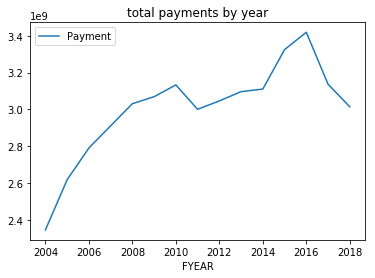

In [122]:
import matplotlib.pyplot as plt
all_df.groupby("FYEAR").agg({"Payment":sum}).plot(title="total payments by year")
plt.savefig("output/total-payments.png")

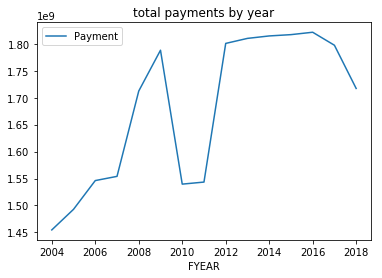

In [137]:
all_df[all_df["GrantName"] == "EDUCATION EQUALIZATION"].groupby("FYEAR").agg({"Payment":sum}).plot(title="total payments by year")

In [152]:
all_df[all_df["GrantName"].apply(
lambda x:x in ["EDUCATION EQUALIZATION",
               "SPEC ED AG PLACEMENTS   EXCESS COST",
               "SPEC ED AG  PLACEMENTS   EXCESS COST",
               "SP ED EXCESS COST STUDENT BASED SUPPLEMENT",
               "TWO PERCENT EDUCATION COST SHARE GRANT",
               "SPECIAL ED EXCESS COST EQUITY",
               "SPED ED AG  PLACEMENTS   EXCESS COST",
               "EXCESS COST   NO NEXUS",
               "ECS ALLIANCE DISTRICT"])].groupby("FYEAR").agg({"Payment":sum})#.plot()

,Payment
FYEAR,
2004,1511746816.000
2005,1554853569.000
2006,1628552362.000
2007,1651023564.000
2008,1831634627.000
2009,1915952964.000
2010,1649767628.000
2011,1653575079.000
2012,1911342423.000


# Are some grant names blank??
Yes. There are 15 million with unknown grant names, but they are only in 2004.

Colleague does not need back that far, so I'm just going to drop it

In [123]:
print ("This many dollars worth of unknown grant names")
all_df[all_df["GrantName"].isnull()]["Payment"].sum()

This many dollars worth of unknown grant names


15517929.59

In [124]:
print("Here are some of the payments with missing grant names")
all_df[all_df["GrantName"].isnull()].head()

Here are some of the payments with missing grant names


,Acct,CCode,CCode_A,CCode_B,Date2,FYEAR,GrantName,InvDate,InvoiceNum,PayDate,...,Spons,TTYpe,Town,Unnamed: 18,Unnamed: 20,VAddrs,VGrp,VName,VType,Vendor
68,nan,12060-20548-82079-2003-170005-SDE00003,12060-20548-82079-2003,12060-20548-82079-170005,2003-12-04,2004,NaN,2003/12/04 #: 173,173,12/4/2003,...,00251S,2,2,nan,nan,5,1,Ansonia,6,2
69,nan,12060-20560-82079-2003-170005-,12060-20560-82079-2003,12060-20560-82079-170005,2003-08-28,2004,NaN,2003/08/28 #: 53,53,8/28/2003,...,00200,2,2,nan,nan,2,1,Ansonia,2,2
70,nan,12060-20560-82079-2003-170005-,12060-20560-82079-2003,12060-20560-82079-170005,2003-08-28,2004,NaN,2003/08/28 #: 54,54,8/28/2003,...,00200,2,2,nan,nan,2,1,Ansonia,2,2
71,nan,12060-20560-82079-2003-170005-,12060-20560-82079-2003,12060-20560-82079-170005,2004-01-09,2004,NaN,2004/01/09 #: NSL__00228,NSL__00228,1/9/2004,...,00200,2,2,nan,nan,2,1,Ansonia,2,2
228,nan,12060-20560-82079-2003-170005-,12060-20560-82079-2003,12060-20560-82079-170005,2003-08-05,2004,NaN,2003/08/05 #: 32,32,8/5/2003,...,00400,4,4,nan,nan,2,1,Avon,2,4


In [125]:
all_df[all_df["GrantName"].isnull()]["FYEAR"].value_counts()

2004    424
Name: FYEAR, dtype: int64

In [126]:
print "Total payments without the null grant names"
45045160531.04 - 15517929.59

Total payments without the null grant names


45029642601.450005

# Clean grant names a little

Remove any extra whitespace
Uppercase
Remove any non-alphanum characters
Should I remove anythin in brackets, or is that too aggressive?


In [127]:
import re

def clean_grantname(gname):
    
    # upper case
    ret = str(gname).upper()

    # drop anything in brackets or parens
    ret = re.sub("\(.*\)"," ",ret)
    ret = re.sub("\[.*\]"," ",ret) 


    # Replace extra whitespace
    #ret = re.sub("\s{2+}","",ret)

    # Replace non-alphanums with spaces
    ret = re.sub("[^A-Z0-9 ]+"," ",ret)

    # Replace non-alphas -- too much?
    ret = re.sub("[^A-Z ]*","",ret)

    ret = ret.strip()
    return ret
    
try:
    # QUICK UNDO
    all_df["GrantName"] = all_df["GrantName_ORIGINAL"]
except:
    pass
    
clean_grantname("Local Charter Schls [270-Side by Side] 	")
all_df["GrantName_ORIGINAL"] = all_df["GrantName"]
all_df["GrantName"] = all_df["GrantName"].apply(clean_grantname)

In [128]:
# QUICK UNDO
# all_df["GrantName"] = all_df["GrantName_ORIGINAL"]

In [129]:
# Produce a spreadsheet so we know how grant names were collapsed
# in case colleague feels any of the ones that were renamed to 
# match are truly different grants for our purposes.
# Our purposes are to isolate and remove only certain large 
# categories of grants -- to remove construction and to separate
# excess cost grants -- so this broad cleanup should be reasonable.

all_df[["GrantName","GrantName_ORIGINAL"]].set_index("GrantName").drop_duplicates().sort_index()
has_dupes = all_df[["GrantName","GrantName_ORIGINAL"]].set_index("GrantName").drop_duplicates().sort_index().index.value_counts()
has_dupes = has_dupes.to_frame()
has_dupes = has_dupes[has_dupes["GrantName"] > 1]
has_dupes

reconcile = all_df[["GrantName","GrantName_ORIGINAL"]].set_index("GrantName").drop_duplicates()
reconcile = reconcile[reconcile.index.map(lambda x: x in has_dupes.index.tolist())]
reconcile.to_csv("output/GrantName-Unification.csv") #.index.value_counts()
reconcile
#.sort_index().to_csv("output/GrantName-Unification.csv") #.index.value_counts()


,GrantName_ORIGINAL
GrantName,
PRIORITY SCHOOL DISTRICTS,Priority School Districts
TITLE I IMPROVING BASIC PROGRAMS,Title I Improving Basic Programs
IDEA PART B SECTION,IDEA-Part B- Section 611
IDEA PART B SECTION,IDEA-Part B- Section 619
S C REG INTEREST,S.C. Reg. Interest-2003 (3089)
S C REG INTEREST,S.C. Reg. Interest-2004 (3089)
S C REG PRINCIPAL,S.C. Reg. Principal-2005 (3090)
S C PROGRESS,S.C. Progress-2004 (3090)
TITLE I,Title I (ESEA)


In [130]:
print "Total payments by rantname"
print all_df.groupby(["GrantName"]).agg({"Payment":sum}).sum()
all_df.groupby(["GrantName"]).agg({"Payment":sum}).to_csv("output/total-payments-by-grant-2004-to-2018.csv")
all_df.groupby(["GrantName"]).agg({"Payment":sum}).sort_values(by="Payment",ascending=False)

Total payments by rantname
Payment   45045160531.040
dtype: float64


,Payment
GrantName,
EDUCATION EQUALIZATION,25210433872.000
SCH CONSTRUCTION PROGRESS,2993017767.180
IDEA PART B SECTION,1519362044.530
TITLE I IMPROVING BASIC PROGRAMS,1454661490.000
MAGNET SCHOOL OPERATING,1247326838.000
S C PROGRESS,1239805928.820
NATIONAL SCHOOL LUNCH,1048915460.590
SPEC ED AG PLACEMENTS EXCESS COST,1043866097.000
ECS ALLIANCE DISTRICT,678414387.000


In [131]:
all_df_backup = all_df.copy()

In [132]:
# Drop grants that colleague wants dropped.
# First, generate an UNMODIFIED drop spreadsheet, and then import a 
# human-modified spreadsheet, where the human colleague has 
# set the drop column to true where she wants the grant to not
# appear in the total
drops_empty = all_df.groupby(["GrantName"]).agg({"Payment":sum})
drops_empty["drop"] = False
drops_empty["keep"] = False
drops_empty.to_csv("output/drop-empty.csv",float_format="%.0f")
try:
    drops = pd.read_csv("output/drop-modified.csv",dtype={"drop":bool}).set_index("GrantName")
    #drops = drops[drops["drop"]]
    keeps = drops[drops["Payment"] > 100 * 1000 * 1000]
    print len(all_df)
    print ("Keeping %d grant titles" % len(keeps))
    all_df = all_df[all_df["GrantName"].apply(lambda x: x in keeps.index)]
    print len(all_df)
except Exception as e:
    print str(e)


236689
Keeping 28 grant titles
118900


In [133]:
keeps.sort_values(by="Payment",ascending=False)

,Payment,drop,Notes
GrantName,,,
EDUCATION EQUALIZATION,25210433872.000,False,NaN
SCH CONSTRUCTION PROGRESS,2993017767.180,True,NaN
IDEA PART B SECTION,1519362044.530,False,NaN
TITLE I IMPROVING BASIC PROGRAMS,1454661490.000,False,NaN
MAGNET SCHOOL OPERATING,1247326838.000,False,NaN
S C PROGRESS,1239805928.820,True,Construction
NATIONAL SCHOOL LUNCH,1048915460.590,False,NaN
SPEC ED AG PLACEMENTS EXCESS COST,1043866097.000,False,NaN
ECS ALLIANCE DISTRICT,678414387.000,False,NaN


In [112]:
len(all_df["GrantName"].unique())

28

In [136]:
print "Total payments by year and grantname"
all_df_backup.groupby(["GrantName","FYEAR",]).agg({"Payment":sum})#.sum()

Total payments by year and grantname


Payment
GrantName                                        FYEAR            
ACCOUNTABILITY TRAINING AND TECHNICAL ASSISTANCE 2013   125000.000
ADULT EDUC COOPERATING ELIGIBLE ENTITY           2004   522296.000
                                                 2005   507340.000
                                                 2006   576272.000
                                                 2007   552906.000
                                                 2008   626016.000
                                                 2009   645440.000
                                                 2010   635459.000
                                                 2011   612446.000
                                                 2012   595239.000
                                                 2013   611254.000
                                                 2014   555617.000
                                                 2015   538148.000
                                                 2016   503318.000
                                                 2017   435961.000
                                                 2018   428282.000
ADULT EDUCATION                                  2004  2859624.000
                                                 2005  2423424.000
                                                 2006  2361020.000
                                                 2007  2176308.000
                                                 2008  2177317.000
                                                 2009  3266266.000
                                                 2010  3504672.000
                                                 2011  2751491.000
                                                 2012  2562887.000
                                                 2013  2392369.000
                                                 2014  2366297.000
                                                 2015  2367927.000
                                                 2016  2390436.000
                                                 2017  2414051.000
...                                                            ...
YOUNG PARENTS PROGRAM                            2015   229330.000
                                                 2016   216462.000
                                                 2017   205949.000
                                                 2018    71657.000
YOUTH SERVICE BUREAU                             2004  2391542.000
                                                 2005  2464052.000
                                                 2006  2469555.000
                                                 2007  2481892.000
                                                 2008  2495461.000
                                                 2009  2464470.000
                                                 2010  2466052.000
                                                 2011  2466791.000
                                                 2012  2466791.000
                                                 2013  2508046.000
                                                 2014  2531193.000
                                                 2015  2531193.000
                                                 2016  2387691.000
                                                 2017  2201783.000
                                                 2018  2145803.000
YOUTH SERVICE BUREAU ENHANCEMENT                 2008   526150.000
                                                 2009   526150.000
                                                 2010   519900.000
                                                 2011   519900.000
                                                 2012   519900.000
                                                 2013   523443.000
                                                 2014   527334.000
                                                 2015   527334.000
                                       

In [82]:
print "Total payments by district and year"
all_df.groupby(["FYEAR","GrantName"]).agg({"Payment":sum})#.sum()

Total payments by district and year


Payment
FYEAR GrantName                                                       
2004  ADULT EDUC COOPERATING ELIGIBLE ENTITY                522296.000
      ADULT EDUCATION                                      2859624.000
      ADULT EDUCATION   COOPERATIVE                        1371071.000
      ADULT EDUCATION   PROVIDER                          13667419.000
      BILINGUAL EDUCATION                                  2102945.000
      CARL D  PERKINS VOC    TECH  EDUC  ACT                260760.000
      CARL D PERKINS VOC    TECH  EDUC  ACT                6478133.000
      CHILD   ADULT CARE   CASH IN LIEU COMMOD               56787.000
      CHILD   ADULT CARE FOOD PROG ADMIN                      6058.000
      CHILD   ADULT CARE FOOD PROGRAM                         3200.000
      CHILD   ADULT FOOD PROGRAM   PGM                      958827.000
      CHILD NUTRITION STATE MATCHING GRANT                 2122938.000
      COMPREHENSIVE SCHOOL REFORM                          2171519.000
      EARLY READING SUCCESS                               18508932.000
      EARLY READING SUCCESS   COMPETITIVE                  1630099.000
      EDUCATION EQUALIZATION                            1454524550.000
      EDUCATION OF HOMELESS CHILDREN AND YOUTH              343325.000
      EVEN START FAMILY LITERACY PROGRAM                   1427817.000
      EVEN START FAMILY RESOURCE PROGRAM                    235550.000
      EXTENDED SCHOOL HOURS                                3149790.000
      FAMILY RESOURCE CENTER PGM                           3742792.000
      GENERAL IMPROVEMENTS TO SCHOOL BUILDINGS            10627826.000
      HEAD START ENHANCEMENT                                242465.000
      HEAD START SERVICES                                   382531.000
      IDEA PART B  SECTION                                73726574.000
      IDEA PLANNING GRANTS                                   16500.000
      IDEA SLIVER GRANT                                    2734658.000
      IMMIGRANT   YOUTH EDUCATION PROGRAM                   483963.000
      INTERDISTRICT COOPERATIVE                            4686721.000
      LEARN AND SERVE AMERICA K  SCHOOL BASE                100570.000
...                                                                ...
2018  SCHOOL BASED DIVERSION INITIATIVE                     140000.000
      SCHOOL BREAKFAST PROGRAM                            29048863.750
      SCHOOL IMPROVEMENT                                    293306.000
      SCHOOL IMPROVEMENT G                                 2323602.000
      SCHOOL READINESS AND CHILD DAY CARE GRANT PROGRAM   77958631.000
      SCHOOL READINESS GRANT PROGRAM                       8950503.000
      SCHOOL READINESS QE                                        0.000
      SFSP ADVANCE TEMP CODING                                  -0.000
      SHEFF SETTLEMENT                                     2532750.000
      SMART START                                          4136000.000
      SPEC ED AG PLACEMENTS   EXCESS COST                128446492.000
      SPECIAL MILK PROGRAM FOR CHILDREN                      20178.730
      ST CENTURY COMMUNITY LEARNING CENTERS                4998709.000
      STATE SCHOOL BREAKFAST                               1956321.000
      STUDENT SUPPORT AND ACADEMIC ENRICHMENT GRANT        2176411.000
      SUMMER ADMIN                                          354633.390
      SUMMER FOOD SERVICE PROG   ADMIN                        2547.630
      SUMMER FOOD SERVICE PROGRAM   OPR                    3690143.850
      SUPPORTS FOR PREGNANT AND PARENTING TEENS               4584.000
      TITLE I   LOCAL N   D                                 220966.000
      TITLE I   SOD   IMPROVING BASIC PROGRAMS              159868.000
      TITLE I  PART A IMPROVING BASIC PROGRAMS             3321395.000
      TITLE I IMPROVING BASIC PROGRAMS                   100707146.000
      TITLE I PRT A SCHOOL IMPROVEMENT                     3289253.000
      TITLE II P

In [83]:
print "Number of districts"
len(all_df["VName"].unique())

Number of districts


122

In [84]:
for d in all_df["VName"].unique():
    print d
    

Ansonia
Avon
Berlin
Bethel
Bloomfield
Bolton
Bozrah
Branford
Bridgeport
Bristol
Brookfield
Brooklyn
Canterbury
Canton
Cheshire
Clinton
Colchester
Columbia
Coventry
Cromwell
Danbury
Darien
Derby
Eastford
East Granby
East Haddam
East Hampton
East Hartford
East Haven
East Lyme
East Windsor
Ellington
Enfield
Fairfield
Farmington
Franklin
Glastonbury
Granby
Greenwich
Griswold
Groton
Guilford
Hamden
Hartford
Hartland
Killingly
Lebanon
Ledyard
Lisbon
Litchfield
Madison
Manchester
Meriden
Middletown
Milford
Monroe
Montville
Naugatuck
New Britain
New Canaan
New Fairfield
New Haven
Newington
New London
New Milford
Newtown
North Branford
North Haven
North Stonington
Norwalk
Norwich
Old Saybrook
Oxford
Plainfield
Plainville
Plymouth
Pomfret
Portland
Preston
Putnam
Ridgefield
Rocky Hill
Salem
Seymour
Shelton
Sherman
Simsbury
Somers
Southington
South Windsor
Sprague
Stafford
Stamford
Sterling
Stonington
Stratford
Suffield
Thomaston
Thompson
Tolland
Torrington
Trumbull
Union
Vernon
Voluntown
Wallingf

In [85]:
all_df.groupby(["VName","FYEAR"]).agg({"Payment":sum})#.sum()

Payment
VName     FYEAR             
Ansonia   2004  15719237.990
          2005  17815777.310
          2006  18317458.270
          2007  19015633.540
          2008  20755734.210
          2009  21034180.890
          2010  21796853.320
          2011  22181436.600
          2012  21955987.390
          2013  21488258.200
          2014  22007731.820
          2015  22245689.950
          2016  22883103.310
          2017  22849402.080
          2018  22866629.560
Avon      2004   1599405.390
          2005   1874596.560
          2006   2135340.340
          2007   2256197.160
          2008   2721874.420
          2009   2904506.120
          2010   3786164.490
          2011   3316628.960
          2012   3576824.470
          2013   3633484.040
          2014   4286031.270
          2015   4872096.910
          2016   4750402.200
          2017   4320536.110
          2018   3895798.410
...                      ...
Wolcott   2004  11739824.850
          2005  12458556.830
          2006  13030200.090
          2007  13672881.510
          2008  15145733.200
          2009  15696727.120
          2010  16079690.620
          2011  16428413.830
          2012  16614092.160
          2013  15957144.120
          2014  16038922.400
          2015  16127570.880
          2016  16262652.730
          2017  15849446.490
          2018  14084226.060
Woodstock 2004   5148133.630
          2005   5259958.330
          2006   5472678.170
          2007   5494300.670
          2008   6087630.730
          2009   6296819.450
          2010   6551519.020
          2011   6523355.070
          2012   6489706.430
          2013   6193709.280
          2014   6289276.950
          2015   6338905.070
          2016   6378432.550
          2017   6182634.090
          2018   5744189.070

[1830 rows x 1 columns]

In [90]:
all_df.groupby(["VName","FYEAR"]).agg({"Payment":sum}).to_csv("output/grants-by-town-year.csv")
all_df[all_df["GrantName"] == "EDUCATION EQUALIZATION"].groupby(["VName","FYEAR"]).agg({"Payment":sum}).to_csv("output/ecs-by-town-year.csv")

In [89]:
all_df.groupby(["GrantName","FYEAR"]).agg({"Payment":sum}).sort_values(by="Payment",ascending=False)#.to_csv("output/grants-by-town-year.csv")

Payment
GrantName                                         FYEAR               
EDUCATION EQUALIZATION                            2016  1821620504.000
                                                  2015  1817170642.000
                                                  2014  1814756805.000
                                                  2013  1810206869.000
                                                  2012  1800884560.000
                                                  2017  1797482888.000
                                                  2009  1788247613.000
                                                  2018  1717241947.000
                                                  2008  1712452116.000
                                                  2007  1553963572.000
                                                  2006  1546163605.000
                                                  2011  1543371414.000
                                                  2010  1539563263.000
                                                  2005  1492783524.000
                                                  2004  1454524550.000
ARRA STABILIZATION ED GRANTS                      2011   257210660.000
                                                  2010   165922300.000
ECS ALLIANCE DISTRICT                             2016   151506306.000
                                                  2017   140496106.000
                                                  2018   135820608.000
MAGNET SCHOOL OPERATING                           2018   135598495.000
                                                  2016   133676464.000
                                                  2017   133143573.000
                                                  2015   130447142.000
ECS ALLIANCE DISTRICT                             2015   129143575.000
SPEC ED AG PLACEMENTS   EXCESS COST               2018   128446492.000
MAGNET SCHOOL OPERATING                           2014   121702466.000
IDEA PART B  SECTION                              2013   108996310.000
MAGNET SCHOOL OPERATING                           2013   108311516.000
IDEA PART B  SECTION                              2018   108191594.000
...                                                                ...
SUMMER FOOD SERVICE PROG   ADMIN                  2012        1944.000
                                                  2004        1733.000
SAFE LEARNING GRANT                               2004        1634.000
CHILD   ADULT CARE FOOD PROG ADMIN                2009        1600.000
CARL D PERKINS  INNOVATION                        2017        1200.000
CHILD   ADULT CARE FOOD PROG ADMIN                2008        1017.000
                                                  2005         903.000
                                                  2006         801.000
                                                  2010         775.000
SUMMER FOOD SERVICE PROGRAM   OPR                 2011         746.540
CHILD   ADULT CARE FOOD PROG ADMIN                2007         577.000
TITLE II PART A TEACHER   PRINC PRIOR YR PYMT     2009         200.000
IDEA  PART B  SECTION  PRIOR YR PYMT              2009         164.000
IDEA SLIVER GRANT                                 2007         106.000
TITLE IV   SAFE   DRUG FREE   PRIOR YR PYMT       2009           5.000
TITLE I IMPROVING BASIC PROG PRIOR YEAR PAYMENT   2009           5.000
SFSP COMBINED                                     2016           0.000
PRESCHOOL DEVELOPMENT GRANT   QUALITY ENHANCEMENT 2018           0.000
TEMPORARY FINANCING                               2010           0.000
LOCAL CHARTER SCHLS                               2013           0.000
SCHOOL READINESS QE                               2018           0.000
SFSP ADVANCE TEMP CODING                          2018          -0.000
NSL PROGRAM COMBINED                              2015          -0.000
CHILD   ADULT CARE FOOD PROGRAM                   2009        -123.000
ARRA MCKINNEY VE

In [87]:
print "Total payments by district and year"
all_df.groupby(["FYEAR","VName","GrantName"]).agg({"Payment":sum}).to_csv("output/grants-year-district-grantname.csv")
all_df.groupby(["FYEAR","VName","GrantName"]).agg({"Payment":sum})#.to_csv("output/grants-year-district-grantname.csv")

Total payments by district and year


Payment
FYEAR VName     GrantName                                                     
2004  Ansonia   ADULT EDUCATION   COOPERATIVE                        70805.000
                CARL D PERKINS VOC    TECH  EDUC  ACT                39617.000
                CHILD NUTRITION STATE MATCHING GRANT                 15695.000
                EARLY READING SUCCESS                               201582.000
                EDUCATION EQUALIZATION                            11971916.000
                EDUCATION OF HOMELESS CHILDREN AND YOUTH             24067.000
                EXTENDED SCHOOL HOURS                                47189.000
                IDEA PART B  SECTION                                532618.000
                IDEA SLIVER GRANT                                    50000.000
                NAN                                                 109263.890
                NATIONAL SCHOOL LUNCH                               242493.100
                NONPUBLIC HEALTH SERVICES                            25117.000
                OPEN CHOICE                                           4000.000
                PRIORITY SCHOOL DISTRICTS                           403750.000
                QUALITY ENHANCEMENT GRANT                             8011.000
                SCHOOL ACCOUNTABILITY   SUMMER SCHOOL                39618.000
                SCHOOL BREAKFAST PROGRAM                            151231.000
                SCHOOL READINESS                                    130001.000
                SPEC ED AG  PLACEMENTS   EXCESS COST                224288.000
                ST CENTURY COMMUNITY LEARNING CENTERS               150000.000
                STATE SCHOOL BREAKFAST                               16246.000
                SUMMER FOOD SERVICE PROGRAM   OPR                    38204.000
                TITLE I IMPROVING BASIC PROGRAMS                    694028.000
                TITLE I PART B  READING FIRST                        40000.000
                TITLE II   EISENHOWER PROF  DEVEL  PROG               5380.000
                TITLE II PART A TEACHERS                            127734.000
                TITLE II PART D TECHNOLOGY                           17441.000
                TITLE III PART A ENGLISH LANG  ACQUIS                21416.000
                TITLE IV   SAFE   DRUG FREE SCHOOLS                  14675.000
                TITLE IV PART A SAFE   DRUG FREE SCHOOLS              4162.000
...                                                                        ...
2018  Wolcott   EDUCATION EQUALIZATION                            11663926.000
                FEDERAL PRESCHOOL DEVELOPMENT GRANT                 304100.000
                HEALTH FOODS INITIATIVE                              21408.000
                IDEA  PART B  SECTION                                22722.000
                IDEA PART B  SECTION                                457465.000
                MAGNET SCHOOL TRANSPORTATION                        178100.000
                NATIONAL SCHOOL LUNCH                               257434.590
                PRESCHOOL DEVELOPMENT GRANT   QUALITY ENHANCEMENT        0.000
                PRESCHOOL DEVELOPMENT GRANT QUALITY ENHANCEMENT      33499.000
                SCHOOL BREAKFAST PROGRAM                             29621.470
                SCHOOL READINESS GRANT PROGRAM                      187404.000
                SPEC ED AG PLACEMENTS   EXCESS COST                 570377.000
                STATE SCHOOL BREAKFAST                               14470.000
                STUDENT SUPPORT AND ACADEMIC ENRICHMENT GRANT        10000.000
                TITLE I IMPROVING BASIC PROGRAMS                    236141.000
                TITLE II PART A TEACHERS                             56304.000
      Woodstock ADULT EDUCATION   COOPERATIVE                         9370.000
                CHILD NUTRITION STATE MATCHING GRANT                  2925.000
                EDUCATION EQUALIZATION    